In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
import statistics
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_predict

# Reading the Data and Merging Datasets (Undergrad Enrollment and Graduation Rate)

In [2]:
# Reading revenue
# Skips the first eight rows, stops at the 75th row, and calculates the number of rows we have to read starting from the 8th 
# to 75th row
start_row = 8
end_row = 75
num_rows = end_row - start_row + 1

revenue = pd.read_excel('Revenue by Sport from the College Athletics Database.xlsx', skiprows = start_row, nrows = num_rows)
revenue.head()

,Institutions by State,"Baseball, Per Team for Men, 2021 ($)","Basketball, Per Team for Men, 2021 ($)","Basketball, Per Team for Women, 2021 ($)","Football, Per Team for Men, 2021 ($)","Ice Hockey, Per Team for Men, 2021 ($)","Ice Hockey, Per Team for Women, 2021 ($)","Soccer, Per Team for Men, 2021 ($)","Soccer, Per Team for Women, 2021 ($)","Softball, Per Team for Women, 2021 ($)",...,"Softball, Per Team for Women, 2010 ($)","Baseball, Per Team for Men, 2009 ($)","Basketball, Per Team for Men, 2009 ($)","Basketball, Per Team for Women, 2009 ($)","Football, Per Team for Men, 2009 ($)","Ice Hockey, Per Team for Men, 2009 ($)","Ice Hockey, Per Team for Women, 2009 ($)","Soccer, Per Team for Men, 2009 ($)","Soccer, Per Team for Women, 2009 ($)","Softball, Per Team for Women, 2009 ($)"
0,Boston College - Massachusetts,2284132.0,8333993.0,346423.0,38009926.0,2592474.0,2126728.0,1385528.0,1749995.0,1614389.0,...,971040.0,1232548.0,8026369.0,2553151.0,19184902.0,3552882.0,977537.0,825232.0,1203488.0,935675.0
1,Northeastern University - Massachusetts,1834105.0,3384972.0,2486695.0,NaN,3604554.0,2663700.0,1363343.0,1399412.0,NaN,...,NaN,809428.0,1618443.0,1237616.0,4048739.0,2224618.0,1389849.0,441843.0,854728.0,NaN
2,University of Massachusetts-Lowell - Massachus...,1144135.0,2192943.0,1421944.0,NaN,3158132.0,NaN,756227.0,1045636.0,859074.0,...,222222.0,221536.0,554226.0,581334.0,NaN,1251658.0,NaN,146256.0,189657.0,231551.0
3,Merrimack College - Massachusetts,956141.0,1658273.0,1479484.0,3587737.0,2472657.0,1869038.0,611598.0,731360.0,732247.0,...,254536.0,250127.0,660876.0,593887.0,976667.0,1376162.0,NaN,211972.0,221024.0,182963.0
4,Harvard University - Massachusetts,719979.0,1442054.0,1167884.0,3626315.0,1374610.0,996225.0,474889.0,528149.0,550760.0,...,329038.0,374922.0,787352.0,557550.0,2142235.0,822662.0,587733.0,345279.0,365784.0,314970.0


In [3]:
# Reading and Merging Undergrads
# Skips the first eight rows, stops at the 182nd row, and calculates the number of rows we have to read starting from the 8th 
# to 182nd row
end_row = 182
num_rows = end_row - start_row + 1
undergrads_pt1 = pd.read_excel('Full Time Undergraduates 2006-2009.xlsx', skiprows = start_row, nrows = num_rows)
undergrads_pt1.head()

,Institutions by State,"All Gender, All Races/Ethnicities, 2009, #","All Gender, All Races/Ethnicities, 2008, #","All Gender, All Races/Ethnicities, 2007, #","All Gender, All Races/Ethnicities, 2006, #"
0,University of Massachusetts-Amherst - Massachu...,19201.0,18864.0,18523.0,18286.0
1,Boston University - Massachusetts,15859.0,16062.0,16269.0,16110.0
2,Northeastern University - Massachusetts,15699.0,15521.0,15339.0,15195.0
3,Boston College - Massachusetts,9501.0,9258.0,9269.0,9239.0
4,University of Massachusetts-Lowell - Massachus...,7516.0,6726.0,5957.0,5848.0


In [4]:
# We only want Undergrads from 2009-2021!
undergrads_pt1.columns

Index(['Institutions by State', 'All Gender, All Races/Ethnicities, 2009, #',
       'All Gender, All Races/Ethnicities, 2008, #',
       'All Gender, All Races/Ethnicities, 2007, #',
       'All Gender, All Races/Ethnicities, 2006, #'],
      dtype='object')

In [5]:
features = ['Institutions by State', 'All Gender, All Races/Ethnicities, 2009, #']
undergrads_pt1 = undergrads_pt1[features]
undergrads_pt1.head()

,Institutions by State,"All Gender, All Races/Ethnicities, 2009, #"
0,University of Massachusetts-Amherst - Massachu...,19201.0
1,Boston University - Massachusetts,15859.0
2,Northeastern University - Massachusetts,15699.0
3,Boston College - Massachusetts,9501.0
4,University of Massachusetts-Lowell - Massachus...,7516.0


In [6]:
# Skips the first eight rows, stops at the 203rd row, and calculates the number of rows we have to read starting from the 8th 
# to 203rd row
end_row = 203
num__rows = end_row - start_row + 1

undergrads_pt2 = pd.read_excel('Full Time Undergraduates 2010-2021.xlsx', skiprows = start_row, nrows = num_rows)
undergrads_pt2.head()

,Institutions by State,"All Gender, All Races/Ethnicities, 2021, #","All Gender, All Races/Ethnicities, 2020, #","All Gender, All Races/Ethnicities, 2019, #","All Gender, All Races/Ethnicities, 2018, #","All Gender, All Races/Ethnicities, 2017, #","All Gender, All Races/Ethnicities, 2016, #","All Gender, All Races/Ethnicities, 2015, #","All Gender, All Races/Ethnicities, 2014, #","All Gender, All Races/Ethnicities, 2013, #","All Gender, All Races/Ethnicities, 2012, #","All Gender, All Races/Ethnicities, 2011, #","All Gender, All Races/Ethnicities, 2010, #"
0,University of Massachusetts-Amherst - Massachu...,22466.0,22177.0,22417.0,21706.0,21481.0,21340.0,20962.0,20551.0,20384.0,20177.0,20109.0,19694.0
1,Boston University - Massachusetts,17197.0,15945.0,16599.0,16906.0,16350.0,16199.0,16082.0,16083.0,16035.0,16029.0,16137.0,16186.0
2,Northeastern University - Massachusetts,15645.0,15130.0,14034.0,13760.0,13666.0,13345.0,13620.0,13492.0,13204.0,13107.0,12913.0,15905.0
3,University of Massachusetts-Lowell - Massachus...,9973.0,10612.0,10794.0,10585.0,10415.0,9906.0,9686.0,9297.0,8887.0,8621.0,8365.0,8111.0
4,University of Massachusetts-Boston - Massachus...,9889.0,10022.0,9890.0,9897.0,9440.0,9139.0,9261.0,9059.0,8642.0,8281.0,8051.0,7800.0


In [7]:
# Merging part 1 and 2 to make undergrads as one single dataframe we can work with
undergrads = undergrads_pt2.merge(undergrads_pt1)
undergrads.head()

,Institutions by State,"All Gender, All Races/Ethnicities, 2021, #","All Gender, All Races/Ethnicities, 2020, #","All Gender, All Races/Ethnicities, 2019, #","All Gender, All Races/Ethnicities, 2018, #","All Gender, All Races/Ethnicities, 2017, #","All Gender, All Races/Ethnicities, 2016, #","All Gender, All Races/Ethnicities, 2015, #","All Gender, All Races/Ethnicities, 2014, #","All Gender, All Races/Ethnicities, 2013, #","All Gender, All Races/Ethnicities, 2012, #","All Gender, All Races/Ethnicities, 2011, #","All Gender, All Races/Ethnicities, 2010, #","All Gender, All Races/Ethnicities, 2009, #"
0,University of Massachusetts-Amherst - Massachu...,22466.0,22177.0,22417.0,21706.0,21481.0,21340.0,20962.0,20551.0,20384.0,20177.0,20109.0,19694.0,19201.0
1,Boston University - Massachusetts,17197.0,15945.0,16599.0,16906.0,16350.0,16199.0,16082.0,16083.0,16035.0,16029.0,16137.0,16186.0,15859.0
2,Northeastern University - Massachusetts,15645.0,15130.0,14034.0,13760.0,13666.0,13345.0,13620.0,13492.0,13204.0,13107.0,12913.0,15905.0,15699.0
3,University of Massachusetts-Lowell - Massachus...,9973.0,10612.0,10794.0,10585.0,10415.0,9906.0,9686.0,9297.0,8887.0,8621.0,8365.0,8111.0,7516.0
4,University of Massachusetts-Boston - Massachus...,9889.0,10022.0,9890.0,9897.0,9440.0,9139.0,9261.0,9059.0,8642.0,8281.0,8051.0,7800.0,7477.0


In [8]:
# Reading and Merging Grad Rates
# Skips the first eight rows, stops at the 95th row, and calculates the number of rows we have to read starting from the 8th 
# to 95th row
end_row = 95
num_rows = end_row - start_row + 1
grad_rates_pt1 = pd.read_excel('Graduation Rates 2006-2010.xlsx', skiprows = start_row, nrows = num_rows)
grad_rates_pt1.head()

,Institutions by State,"All Genders, All Races/Ethnicities, 2010 (%)","All Genders, All Races/Ethnicities, 2009 (%)","All Genders, All Races/Ethnicities, 2008 (%)","All Genders, All Races/Ethnicities, 2007 (%)","All Genders, All Races/Ethnicities, 2006 (%)"
0,Hebrew College - Massachusetts,100.00,NaN,NaN,NaN,NaN
1,Laboure College of Healthcare - Massachusetts,100.00,NaN,NaN,NaN,NaN
2,Harvard University - Massachusetts,97.37,97.92,97.59,96.76,97.92
3,Williams College - Massachusetts,95.11,96.44,95.73,95.19,95.64
4,Amherst College - Massachusetts,94.82,93.93,94.62,95.58,95.62


In [9]:
# We only want the years to be from 2009-2021!
features = ['Institutions by State',
            'All Genders, All Races/Ethnicities, 2010 (%)',	'All Genders, All Races/Ethnicities, 2009 (%)']
grad_rates_pt1 = grad_rates_pt1[features]
grad_rates_pt1.head()

,Institutions by State,"All Genders, All Races/Ethnicities, 2010 (%)","All Genders, All Races/Ethnicities, 2009 (%)"
0,Hebrew College - Massachusetts,100.00,NaN
1,Laboure College of Healthcare - Massachusetts,100.00,NaN
2,Harvard University - Massachusetts,97.37,97.92
3,Williams College - Massachusetts,95.11,96.44
4,Amherst College - Massachusetts,94.82,93.93


In [10]:
# Reading part 2 of our grad rate data and merging, so we have one single dataframe for grad rates
grad_rates_pt2 = pd.read_excel('Graduation Rates 2011-2021.xlsx', skiprows = start_row, nrows = num_rows)
grad_rates = grad_rates_pt2.merge(grad_rates_pt1)
grad_rates.head()

,Institutions by State,"All Genders, All Races/Ethnicities, 2021 (%)","All Genders, All Races/Ethnicities, 2020 (%)","All Genders, All Races/Ethnicities, 2019 (%)","All Genders, All Races/Ethnicities, 2018 (%)","All Genders, All Races/Ethnicities, 2017 (%)","All Genders, All Races/Ethnicities, 2016 (%)","All Genders, All Races/Ethnicities, 2015 (%)","All Genders, All Races/Ethnicities, 2014 (%)","All Genders, All Races/Ethnicities, 2013 (%)","All Genders, All Races/Ethnicities, 2012 (%)","All Genders, All Races/Ethnicities, 2011 (%)","All Genders, All Races/Ethnicities, 2010 (%)","All Genders, All Races/Ethnicities, 2009 (%)"
0,Laboure College of Healthcare - Massachusetts,100.00,NaN,50.00,NaN,100.00,16.67,100.00,33.33,14.29,37.93,100.00,100.00,NaN
1,Franklin W Olin College of Engineering - Massa...,97.37,93.67,96.34,92.59,91.46,85.56,92.94,94.67,98.63,93.98,96.05,89.86,93.15
2,Harvard University - Massachusetts,96.74,97.63,97.10,97.71,96.44,97.23,97.59,97.52,97.47,96.96,97.43,97.37,97.92
3,Massachusetts Institute of Technology - Massac...,96.20,95.58,95.40,94.16,93.83,92.76,91.93,91.30,93.07,92.81,92.86,92.94,93.19
4,Williams College - Massachusetts,93.83,95.97,95.04,95.43,93.76,93.98,95.60,95.35,95.36,96.44,95.34,95.11,96.44


In [11]:
# Dropping schools with NA data from any of the years. Renaming all schools without the state that it's 
# in because we already know they're all in Massachusetts. Renaming first column to 'Institutions'
grad_rates.dropna(inplace = True)
grad_rates['Institutions by State'] = grad_rates['Institutions by State'].str.replace(' - Massachusetts', '')
grad_rates.rename(columns={'Institutions by State': 'Institutions'}, inplace=True)
grad_rates.head()

,Institutions,"All Genders, All Races/Ethnicities, 2021 (%)","All Genders, All Races/Ethnicities, 2020 (%)","All Genders, All Races/Ethnicities, 2019 (%)","All Genders, All Races/Ethnicities, 2018 (%)","All Genders, All Races/Ethnicities, 2017 (%)","All Genders, All Races/Ethnicities, 2016 (%)","All Genders, All Races/Ethnicities, 2015 (%)","All Genders, All Races/Ethnicities, 2014 (%)","All Genders, All Races/Ethnicities, 2013 (%)","All Genders, All Races/Ethnicities, 2012 (%)","All Genders, All Races/Ethnicities, 2011 (%)","All Genders, All Races/Ethnicities, 2010 (%)","All Genders, All Races/Ethnicities, 2009 (%)"
1,Franklin W Olin College of Engineering,97.37,93.67,96.34,92.59,91.46,85.56,92.94,94.67,98.63,93.98,96.05,89.86,93.15
2,Harvard University,96.74,97.63,97.10,97.71,96.44,97.23,97.59,97.52,97.47,96.96,97.43,97.37,97.92
3,Massachusetts Institute of Technology,96.20,95.58,95.40,94.16,93.83,92.76,91.93,91.30,93.07,92.81,92.86,92.94,93.19
4,Williams College,93.83,95.97,95.04,95.43,93.76,93.98,95.60,95.35,95.36,96.44,95.34,95.11,96.44
5,Tufts University,93.81,93.91,94.26,92.58,93.23,92.08,93.47,92.30,92.19,92.27,90.25,91.12,90.79


In [12]:
# Doing the same thing we did in the cell before, but with the undergrad dataframe
undergrads.dropna(inplace = True)
undergrads['Institutions by State'] = undergrads['Institutions by State'].str.replace(' - Massachusetts', '')
undergrads.rename(columns={'Institutions by State': 'Institutions'}, inplace=True)
undergrads.head()

,Institutions,"All Gender, All Races/Ethnicities, 2021, #","All Gender, All Races/Ethnicities, 2020, #","All Gender, All Races/Ethnicities, 2019, #","All Gender, All Races/Ethnicities, 2018, #","All Gender, All Races/Ethnicities, 2017, #","All Gender, All Races/Ethnicities, 2016, #","All Gender, All Races/Ethnicities, 2015, #","All Gender, All Races/Ethnicities, 2014, #","All Gender, All Races/Ethnicities, 2013, #","All Gender, All Races/Ethnicities, 2012, #","All Gender, All Races/Ethnicities, 2011, #","All Gender, All Races/Ethnicities, 2010, #","All Gender, All Races/Ethnicities, 2009, #"
0,University of Massachusetts-Amherst,22466.0,22177.0,22417.0,21706.0,21481.0,21340.0,20962.0,20551.0,20384.0,20177.0,20109.0,19694.0,19201.0
1,Boston University,17197.0,15945.0,16599.0,16906.0,16350.0,16199.0,16082.0,16083.0,16035.0,16029.0,16137.0,16186.0,15859.0
2,Northeastern University,15645.0,15130.0,14034.0,13760.0,13666.0,13345.0,13620.0,13492.0,13204.0,13107.0,12913.0,15905.0,15699.0
3,University of Massachusetts-Lowell,9973.0,10612.0,10794.0,10585.0,10415.0,9906.0,9686.0,9297.0,8887.0,8621.0,8365.0,8111.0,7516.0
4,University of Massachusetts-Boston,9889.0,10022.0,9890.0,9897.0,9440.0,9139.0,9261.0,9059.0,8642.0,8281.0,8051.0,7800.0,7477.0


In [13]:
# For Revenue, we decided to fill the NaN values with $0 because 
# some schools do not have specific sport or did not play their seasons due to COVID-19
revenue.fillna(0, inplace=True)
revenue['Institutions by State'] = revenue['Institutions by State'].str.replace(' - Massachusetts', '')
revenue.rename(columns={'Institutions by State': 'Institutions'}, inplace=True)
revenue.head()

,Institutions,"Baseball, Per Team for Men, 2021 ($)","Basketball, Per Team for Men, 2021 ($)","Basketball, Per Team for Women, 2021 ($)","Football, Per Team for Men, 2021 ($)","Ice Hockey, Per Team for Men, 2021 ($)","Ice Hockey, Per Team for Women, 2021 ($)","Soccer, Per Team for Men, 2021 ($)","Soccer, Per Team for Women, 2021 ($)","Softball, Per Team for Women, 2021 ($)",...,"Softball, Per Team for Women, 2010 ($)","Baseball, Per Team for Men, 2009 ($)","Basketball, Per Team for Men, 2009 ($)","Basketball, Per Team for Women, 2009 ($)","Football, Per Team for Men, 2009 ($)","Ice Hockey, Per Team for Men, 2009 ($)","Ice Hockey, Per Team for Women, 2009 ($)","Soccer, Per Team for Men, 2009 ($)","Soccer, Per Team for Women, 2009 ($)","Softball, Per Team for Women, 2009 ($)"
0,Boston College,2284132.0,8333993.0,346423.0,38009926.0,2592474.0,2126728.0,1385528.0,1749995.0,1614389.0,...,971040.0,1232548.0,8026369.0,2553151.0,19184902.0,3552882.0,977537.0,825232.0,1203488.0,935675.0
1,Northeastern University,1834105.0,3384972.0,2486695.0,0.0,3604554.0,2663700.0,1363343.0,1399412.0,0.0,...,0.0,809428.0,1618443.0,1237616.0,4048739.0,2224618.0,1389849.0,441843.0,854728.0,0.0
2,University of Massachusetts-Lowell,1144135.0,2192943.0,1421944.0,0.0,3158132.0,0.0,756227.0,1045636.0,859074.0,...,222222.0,221536.0,554226.0,581334.0,0.0,1251658.0,0.0,146256.0,189657.0,231551.0
3,Merrimack College,956141.0,1658273.0,1479484.0,3587737.0,2472657.0,1869038.0,611598.0,731360.0,732247.0,...,254536.0,250127.0,660876.0,593887.0,976667.0,1376162.0,0.0,211972.0,221024.0,182963.0
4,Harvard University,719979.0,1442054.0,1167884.0,3626315.0,1374610.0,996225.0,474889.0,528149.0,550760.0,...,329038.0,374922.0,787352.0,557550.0,2142235.0,822662.0,587733.0,345279.0,365784.0,314970.0


In [14]:
# We want to look for schools that both the undergrad and grad rates
# dataframes have in common
common_undergrads_gradrates = pd.merge(undergrads, grad_rates, on = 'Institutions')
common_undergrads_gradrates.head()

,Institutions,"All Gender, All Races/Ethnicities, 2021, #","All Gender, All Races/Ethnicities, 2020, #","All Gender, All Races/Ethnicities, 2019, #","All Gender, All Races/Ethnicities, 2018, #","All Gender, All Races/Ethnicities, 2017, #","All Gender, All Races/Ethnicities, 2016, #","All Gender, All Races/Ethnicities, 2015, #","All Gender, All Races/Ethnicities, 2014, #","All Gender, All Races/Ethnicities, 2013, #",...,"All Genders, All Races/Ethnicities, 2018 (%)","All Genders, All Races/Ethnicities, 2017 (%)","All Genders, All Races/Ethnicities, 2016 (%)","All Genders, All Races/Ethnicities, 2015 (%)","All Genders, All Races/Ethnicities, 2014 (%)","All Genders, All Races/Ethnicities, 2013 (%)","All Genders, All Races/Ethnicities, 2012 (%)","All Genders, All Races/Ethnicities, 2011 (%)","All Genders, All Races/Ethnicities, 2010 (%)","All Genders, All Races/Ethnicities, 2009 (%)"
0,University of Massachusetts-Amherst,22466.0,22177.0,22417.0,21706.0,21481.0,21340.0,20962.0,20551.0,20384.0,...,79.82,77.18,76.14,77.84,75.09,72.66,70.22,67.16,68.20,65.44
1,Boston University,17197.0,15945.0,16599.0,16906.0,16350.0,16199.0,16082.0,16083.0,16035.0,...,88.17,87.13,86.52,85.26,84.70,84.48,83.91,84.75,82.79,82.23
2,Northeastern University,15645.0,15130.0,14034.0,13760.0,13666.0,13345.0,13620.0,13492.0,13204.0,...,88.12,87.13,86.17,84.43,81.62,82.56,78.56,76.82,77.41,76.14
3,University of Massachusetts-Lowell,9973.0,10612.0,10794.0,10585.0,10415.0,9906.0,9686.0,9297.0,8887.0,...,62.92,60.08,55.97,55.64,54.49,54.26,53.81,50.00,50.70,52.78
4,University of Massachusetts-Boston,9889.0,10022.0,9890.0,9897.0,9440.0,9139.0,9261.0,9059.0,8642.0,...,47.91,48.03,45.08,42.40,42.08,43.58,37.94,39.83,40.33,38.04


In [15]:
# Checking number of rows that we have in common
len(set(common_undergrads_gradrates['Institutions']))

69

In [16]:
# Using the schools that are in common from grad rates and undergrad enrollment,
# let's find which of those schools have sports programs
filtered_revenue = revenue[revenue['Institutions'].isin(common_undergrads_gradrates['Institutions'])]
filtered_revenue.head()

,Institutions,"Baseball, Per Team for Men, 2021 ($)","Basketball, Per Team for Men, 2021 ($)","Basketball, Per Team for Women, 2021 ($)","Football, Per Team for Men, 2021 ($)","Ice Hockey, Per Team for Men, 2021 ($)","Ice Hockey, Per Team for Women, 2021 ($)","Soccer, Per Team for Men, 2021 ($)","Soccer, Per Team for Women, 2021 ($)","Softball, Per Team for Women, 2021 ($)",...,"Softball, Per Team for Women, 2010 ($)","Baseball, Per Team for Men, 2009 ($)","Basketball, Per Team for Men, 2009 ($)","Basketball, Per Team for Women, 2009 ($)","Football, Per Team for Men, 2009 ($)","Ice Hockey, Per Team for Men, 2009 ($)","Ice Hockey, Per Team for Women, 2009 ($)","Soccer, Per Team for Men, 2009 ($)","Soccer, Per Team for Women, 2009 ($)","Softball, Per Team for Women, 2009 ($)"
0,Boston College,2284132.0,8333993.0,346423.0,38009926.0,2592474.0,2126728.0,1385528.0,1749995.0,1614389.0,...,971040.0,1232548.0,8026369.0,2553151.0,19184902.0,3552882.0,977537.0,825232.0,1203488.0,935675.0
1,Northeastern University,1834105.0,3384972.0,2486695.0,0.0,3604554.0,2663700.0,1363343.0,1399412.0,0.0,...,0.0,809428.0,1618443.0,1237616.0,4048739.0,2224618.0,1389849.0,441843.0,854728.0,0.0
2,University of Massachusetts-Lowell,1144135.0,2192943.0,1421944.0,0.0,3158132.0,0.0,756227.0,1045636.0,859074.0,...,222222.0,221536.0,554226.0,581334.0,0.0,1251658.0,0.0,146256.0,189657.0,231551.0
3,Merrimack College,956141.0,1658273.0,1479484.0,3587737.0,2472657.0,1869038.0,611598.0,731360.0,732247.0,...,254536.0,250127.0,660876.0,593887.0,976667.0,1376162.0,0.0,211972.0,221024.0,182963.0
4,Harvard University,719979.0,1442054.0,1167884.0,3626315.0,1374610.0,996225.0,474889.0,528149.0,550760.0,...,329038.0,374922.0,787352.0,557550.0,2142235.0,822662.0,587733.0,345279.0,365784.0,314970.0


In [17]:
# Divide all values by a million to get revenue in terms of millions
filtered_revenue.iloc[:, 1:] = filtered_revenue.iloc[:, 1:] / 1000000
filtered_revenue.head()

,Institutions,"Baseball, Per Team for Men, 2021 ($)","Basketball, Per Team for Men, 2021 ($)","Basketball, Per Team for Women, 2021 ($)","Football, Per Team for Men, 2021 ($)","Ice Hockey, Per Team for Men, 2021 ($)","Ice Hockey, Per Team for Women, 2021 ($)","Soccer, Per Team for Men, 2021 ($)","Soccer, Per Team for Women, 2021 ($)","Softball, Per Team for Women, 2021 ($)",...,"Softball, Per Team for Women, 2010 ($)","Baseball, Per Team for Men, 2009 ($)","Basketball, Per Team for Men, 2009 ($)","Basketball, Per Team for Women, 2009 ($)","Football, Per Team for Men, 2009 ($)","Ice Hockey, Per Team for Men, 2009 ($)","Ice Hockey, Per Team for Women, 2009 ($)","Soccer, Per Team for Men, 2009 ($)","Soccer, Per Team for Women, 2009 ($)","Softball, Per Team for Women, 2009 ($)"
0,Boston College,2.284132,8.333993,0.346423,38.009926,2.592474,2.126728,1.385528,1.749995,1.614389,...,0.971040,1.232548,8.026369,2.553151,19.184902,3.552882,0.977537,0.825232,1.203488,0.935675
1,Northeastern University,1.834105,3.384972,2.486695,0.000000,3.604554,2.663700,1.363343,1.399412,0.000000,...,0.000000,0.809428,1.618443,1.237616,4.048739,2.224618,1.389849,0.441843,0.854728,0.000000
2,University of Massachusetts-Lowell,1.144135,2.192943,1.421944,0.000000,3.158132,0.000000,0.756227,1.045636,0.859074,...,0.222222,0.221536,0.554226,0.581334,0.000000,1.251658,0.000000,0.146256,0.189657,0.231551
3,Merrimack College,0.956141,1.658273,1.479484,3.587737,2.472657,1.869038,0.611598,0.731360,0.732247,...,0.254536,0.250127,0.660876,0.593887,0.976667,1.376162,0.000000,0.211972,0.221024,0.182963
4,Harvard University,0.719979,1.442054,1.167884,3.626315,1.374610,0.996225,0.474889,0.528149,0.550760,...,0.329038,0.374922,0.787352,0.557550,2.142235,0.822662,0.587733,0.345279,0.365784,0.314970


In [18]:
# Since we looked at what schools had a sports program using '.isin', let's see if our indexes were changed
filtered_revenue.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 51, 52, 56, 57, 59, 60],
      dtype='int64')

In [19]:
# We must reset the index because towards the end, it isn't in chronological order anymore,
# which will mess up our new and improved dataframe when we add institutions later on
filtered_revenue.reset_index(drop=True, inplace=True)

# Row indexes have been fixed!
filtered_revenue.index

RangeIndex(start=0, stop=52, step=1)

In [20]:
# Finding totals for each year by going through every nine columns, which make up a year
# This will output a huge list with all the school's respective total for each year,
# but will not mean anything yet because we must group this later on
min_year = 2009
max_year = 2021
years = list(range(min_year, max_year + 1))
years.reverse()

year_total = []

for i in range(len(filtered_revenue['Institutions'])):
    start = 1

    for j in range(max_year - min_year + 1):

        list_revenue_in_year = filtered_revenue.iloc[i][start:start + 9]
        filtered_revenue[j] = year_total.append(round(sum(list_revenue_in_year), 2))
    
        start = start + 9

C:\Users\dku19\AppData\Local\Temp\ipykernel_20844\295322890.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_revenue[j] = year_total.append(round(sum(list_revenue_in_year), 2))
C:\Users\dku19\AppData\Local\Temp\ipykernel_20844\295322890.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_revenue[j] = year_total.append(round(sum(list_revenue_in_year), 2))
C:\Users\dku19\AppData\Local\Temp\ipykernel_20844\295322890.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [21]:
# Making a list for every school, then confirming we have 52 schools
year_total_cleaned = [year_total[i : i + 13] for i in range(0, len(year_total), 13)]       
len(year_total_cleaned)

52

In [22]:
# Creating a new dataframe, which will be the one we will actually use
# The values represent the school's total revenue for the five major sports in that year in millions of dollars
revenue_by_year = pd.DataFrame(year_total_cleaned, columns = years)
revenue_by_year.head()

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,58.44,47.06,50.85,51.39,51.04,46.87,45.19,44.65,39.30,37.67,35.01,38.35,38.49
1,16.74,14.30,14.79,14.89,14.81,13.07,13.13,12.17,11.36,11.11,10.23,9.79,12.63
2,10.58,8.98,10.47,10.27,10.02,9.26,8.27,7.49,6.24,4.35,4.34,3.50,3.18
3,14.10,11.82,12.48,10.91,9.71,8.88,8.57,6.82,6.36,5.98,5.69,4.67,4.47
4,10.88,0.00,10.44,10.04,9.05,8.96,8.44,8.38,8.08,7.77,7.21,6.81,6.30


In [23]:
# Inserting the corresponding institutions to our new dataframe with revenue data
revenue_by_year.insert(0, 'Institutions', filtered_revenue['Institutions'])
revenue_by_year.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,Boston College,58.44,47.06,50.85,51.39,51.04,46.87,45.19,44.65,39.30,37.67,35.01,38.35,38.49
1,Northeastern University,16.74,14.30,14.79,14.89,14.81,13.07,13.13,12.17,11.36,11.11,10.23,9.79,12.63
2,University of Massachusetts-Lowell,10.58,8.98,10.47,10.27,10.02,9.26,8.27,7.49,6.24,4.35,4.34,3.50,3.18
3,Merrimack College,14.10,11.82,12.48,10.91,9.71,8.88,8.57,6.82,6.36,5.98,5.69,4.67,4.47
4,Harvard University,10.88,0.00,10.44,10.04,9.05,8.96,8.44,8.38,8.08,7.77,7.21,6.81,6.30


In [24]:
# Let's find the revenue_total of all the schools (in millions), and show the top earning and lowest earning schools
revenue_total_sorted = revenue_by_year.copy()
revenue_total_sorted['revenue_total'] = revenue_total_sorted.iloc[:,1:].sum(axis = 1)
revenue_total_sorted = revenue_total_sorted.copy().sort_values(by = 'revenue_total', ascending = False)
revenue_total_sorted.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,revenue_total
0,Boston College,58.44,47.06,50.85,51.39,51.04,46.87,45.19,44.65,39.30,37.67,35.01,38.35,38.49,584.31
7,University of Massachusetts-Amherst,25.46,18.70,23.46,23.47,23.04,23.59,20.76,16.85,18.12,16.80,15.32,13.40,12.87,251.84
49,Boston University,15.81,12.95,15.00,14.54,14.65,16.41,12.88,13.11,14.29,13.25,12.58,11.97,11.49,178.93
5,College of the Holy Cross,19.25,14.32,15.86,15.61,15.68,14.99,14.09,13.36,11.99,11.76,10.76,10.31,10.90,178.88
1,Northeastern University,16.74,14.30,14.79,14.89,14.81,13.07,13.13,12.17,11.36,11.11,10.23,9.79,12.63,169.02


In [25]:
# Schools with least revenue in sports
revenue_total_sorted.tail()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,revenue_total
44,College of Our Lady of the Elms,0.36,0.17,0.29,0.35,0.32,0.38,0.46,0.39,0.38,0.29,0.20,0.26,0.25,4.10
40,Lesley University,0.25,0.06,0.24,0.26,0.37,0.33,0.31,0.28,0.27,0.26,0.23,0.24,0.20,3.30
47,Pine Manor College,0.00,0.00,0.34,0.34,0.32,0.20,0.21,0.22,0.10,0.10,0.00,0.00,0.00,1.83
50,Hampshire College,0.04,0.00,0.03,0.04,0.04,0.04,0.04,0.04,0.05,0.04,0.03,0.00,0.00,0.39
46,Benjamin Franklin Cummings Institute of Techno...,0.00,0.00,0.05,0.05,0.05,0.03,0.00,0.00,0.00,0.03,0.03,0.03,0.03,0.30


In [26]:
# Renaming undergrad columns for conciseness 
undergrads.columns = ['Institutions'] + years
undergrads.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,University of Massachusetts-Amherst,22466.0,22177.0,22417.0,21706.0,21481.0,21340.0,20962.0,20551.0,20384.0,20177.0,20109.0,19694.0,19201.0
1,Boston University,17197.0,15945.0,16599.0,16906.0,16350.0,16199.0,16082.0,16083.0,16035.0,16029.0,16137.0,16186.0,15859.0
2,Northeastern University,15645.0,15130.0,14034.0,13760.0,13666.0,13345.0,13620.0,13492.0,13204.0,13107.0,12913.0,15905.0,15699.0
3,University of Massachusetts-Lowell,9973.0,10612.0,10794.0,10585.0,10415.0,9906.0,9686.0,9297.0,8887.0,8621.0,8365.0,8111.0,7516.0
4,University of Massachusetts-Boston,9889.0,10022.0,9890.0,9897.0,9440.0,9139.0,9261.0,9059.0,8642.0,8281.0,8051.0,7800.0,7477.0


In [27]:
# Looking at graduation rates that have sports programs, resetting index (for reasons we saw earlier), and renaming columns
# for conciseness
grad_rates = grad_rates[grad_rates['Institutions'].isin(revenue_by_year['Institutions'])]
grad_rates.reset_index(drop=True, inplace=True)
grad_rates.columns = ['Institutions'] + years
grad_rates.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,Harvard University,96.74,97.63,97.10,97.71,96.44,97.23,97.59,97.52,97.47,96.96,97.43,97.37,97.92
1,Massachusetts Institute of Technology,96.20,95.58,95.40,94.16,93.83,92.76,91.93,91.30,93.07,92.81,92.86,92.94,93.19
2,Williams College,93.83,95.97,95.04,95.43,93.76,93.98,95.60,95.35,95.36,96.44,95.34,95.11,96.44
3,Tufts University,93.81,93.91,94.26,92.58,93.23,92.08,93.47,92.30,92.19,92.27,90.25,91.12,90.79
4,Babson College,93.71,94.65,93.24,91.47,92.15,90.82,88.65,90.28,90.73,90.07,90.41,90.85,91.09


# Exploring our data

In [28]:
# We will be normalizing each of our dataframes to get a visualization of how revenue, undergrad enrollment, and
# graduation rate has changed over time. We are normalizing since the scales of all of this data are so different
revenue_by_year_normalized = revenue_by_year.copy()
for i in years:
    revenue_by_year_normalized[years] = round(((revenue_by_year[years] - revenue_by_year[years].min()) 
                                               / (revenue_by_year[years].max() - revenue_by_year[years].min())), 4)
revenue_by_year_normalized.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,Boston College,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,Northeastern University,0.2864,0.3039,0.2904,0.2892,0.2896,0.2784,0.2906,0.2726,0.2891,0.2944,0.2922,0.2553,0.3281
2,University of Massachusetts-Lowell,0.1810,0.1908,0.2054,0.1992,0.1957,0.1971,0.1830,0.1677,0.1588,0.1148,0.1240,0.0913,0.0826
3,Merrimack College,0.2413,0.2512,0.2450,0.2117,0.1896,0.1889,0.1896,0.1527,0.1618,0.1581,0.1625,0.1218,0.1161
4,Harvard University,0.1862,0.0000,0.2048,0.1947,0.1767,0.1906,0.1868,0.1877,0.2056,0.2056,0.2059,0.1776,0.1637


In [29]:
grad_rates_normalized = grad_rates.copy()

for i in years:
    grad_rates_normalized[years] = round(((grad_rates[years] - grad_rates[years].min()) / (grad_rates[years].max() - grad_rates[years].min())), 4)
grad_rates_normalized.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,Harvard University,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,Massachusetts Institute of Technology,0.9930,0.9719,0.9733,0.9487,0.9633,0.9348,0.9171,0.9051,0.9312,0.9382,0.9279,0.9296,0.9253
2,Williams College,0.9621,0.9773,0.9677,0.9670,0.9623,0.9526,0.9709,0.9669,0.9670,0.9923,0.9670,0.9641,0.9766
3,Tufts University,0.9618,0.9491,0.9555,0.9258,0.9548,0.9249,0.9397,0.9203,0.9174,0.9301,0.8867,0.9007,0.8874
4,Babson College,0.9605,0.9592,0.9395,0.9097,0.9396,0.9065,0.8691,0.8895,0.8946,0.8974,0.8892,0.8964,0.8922


In [30]:
undergrads_normalized = undergrads.copy()

for i in years:
    undergrads_normalized[years] = round(((undergrads[years] - undergrads[years].min()) / (undergrads[years].max() - undergrads[years].min())), 4)
undergrads_normalized.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,University of Massachusetts-Amherst,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,Boston University,0.7654,0.7188,0.7403,0.7788,0.7610,0.7590,0.7671,0.7825,0.7865,0.7943,0.8024,0.8218,0.8259
2,Northeastern University,0.6963,0.6821,0.6259,0.6338,0.6360,0.6252,0.6496,0.6563,0.6476,0.6495,0.6421,0.8075,0.8175
3,University of Massachusetts-Lowell,0.4438,0.4782,0.4813,0.4875,0.4846,0.4640,0.4618,0.4521,0.4357,0.4270,0.4158,0.4116,0.3912
4,University of Massachusetts-Boston,0.4400,0.4516,0.4409,0.4558,0.4392,0.4280,0.4415,0.4405,0.4237,0.4102,0.4002,0.3958,0.3892


In [31]:
def get_college_stats(df, school):
    '''Given a dataframe of some statistic and the school you're looking for,
    gives the stats from the dataframe of that school'''
    stat = df[df['Institutions'] == school].iloc[0][1:]
    return stat

In [32]:
# Function to create a plot comparing normalized revenue, normalized grad rate, and normalized undergrad enrollment for a school
def plot_trends(revenue_df, grad_rate_df, undergrad_df, school):
    ''' Given three dataframes and a school, creates a plot with that school's stats'''
    school_revenue = get_college_stats(revenue_df, school)
    school_gradrate = get_college_stats(grad_rate_df, school)
    school_undergrad = get_college_stats(undergrad_df, school)

    sns.lineplot(x = years, y = school_revenue,
                 label = 'Revenue (Normalized)', color = 'black')
    sns.lineplot(x = years, y = school_gradrate,
                 label = 'Graduation Rate (Normalized)', color = 'red')
    sns.lineplot(x = years, y = school_undergrad,
                label = 'Undergrad Enrollment (Normalized)', color = 'blue')
    plt.title(f'Stats Overtime at {school}')
    plt.xlabel('Years')
    plt.ylabel('Normalized Values')
    plt.legend()
    plt.show()

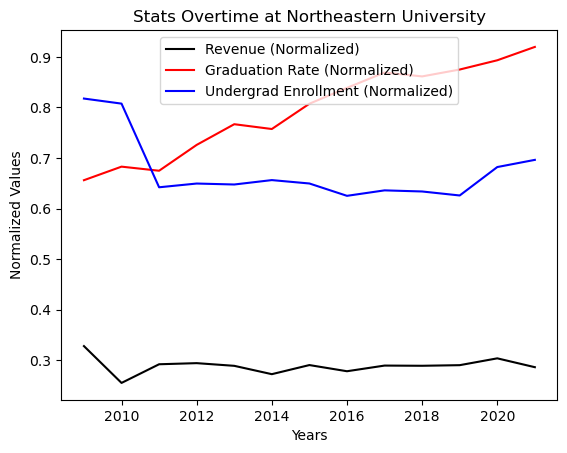

In [33]:
plot_trends(revenue_by_year_normalized, grad_rates_normalized, undergrads_normalized, 'Northeastern University')

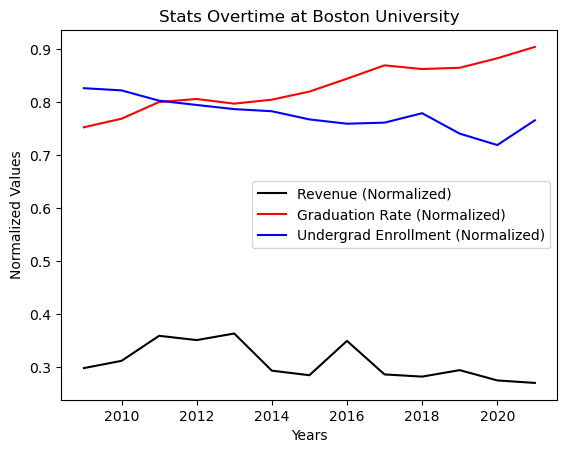

In [34]:
plot_trends(revenue_by_year_normalized, grad_rates_normalized, undergrads_normalized, 'Boston University')

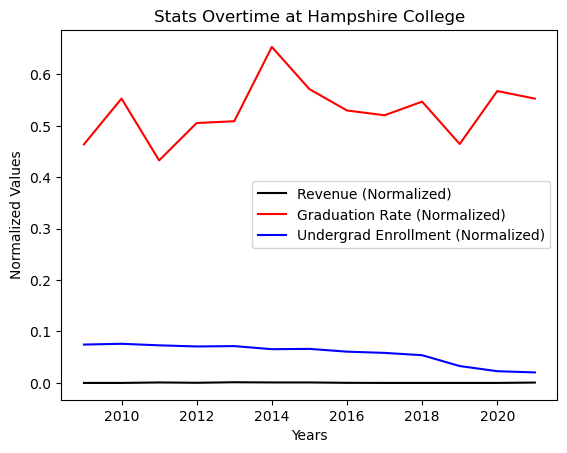

In [35]:
plot_trends(revenue_by_year_normalized, grad_rates_normalized, undergrads_normalized, 'Hampshire College')

# Creating Our Own 'Score' for Graduation Rate

In [36]:
# Who were the 'best' schools in graduation rates?
# Score will be created by aggregating normalized values from 2009-2021
grad_rates_normalized['total'] = grad_rates_normalized.iloc[:,1:].sum(axis = 1)
grad_rates_normalized = grad_rates_normalized.sort_values(by = 'total', ascending = False)
grad_rates_normalized.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,total
0,Harvard University,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,13.0000
2,Williams College,0.9621,0.9773,0.9677,0.9670,0.9623,0.9526,0.9709,0.9669,0.9670,0.9923,0.9670,0.9641,0.9766,12.5938
6,Amherst College,0.9437,0.9595,0.9748,0.9362,0.9828,0.9450,0.9628,0.9472,0.9736,0.9656,0.9819,0.9595,0.9370,12.4696
1,Massachusetts Institute of Technology,0.9930,0.9719,0.9733,0.9487,0.9633,0.9348,0.9171,0.9051,0.9312,0.9382,0.9279,0.9296,0.9253,12.2594
3,Tufts University,0.9618,0.9491,0.9555,0.9258,0.9548,0.9249,0.9397,0.9203,0.9174,0.9301,0.8867,0.9007,0.8874,12.0542


In [37]:
# Combining Revenue and Graduation Rate Score
features = ['Institutions', 'total']
revenue_and_gradrates = pd.merge(revenue_by_year, grad_rates_normalized[features], on = 'Institutions')
revenue_and_gradrates = revenue_and_gradrates.rename(columns={'total': 'grad_rate_score'})
revenue_and_gradrates.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,grad_rate_score
0,Boston College,58.44,47.06,50.85,51.39,51.04,46.87,45.19,44.65,39.30,37.67,35.01,38.35,38.49,11.9414
1,Northeastern University,16.74,14.30,14.79,14.89,14.81,13.07,13.13,12.17,11.36,11.11,10.23,9.79,12.63,10.3278
2,University of Massachusetts-Lowell,10.58,8.98,10.47,10.27,10.02,9.26,8.27,7.49,6.24,4.35,4.34,3.50,3.18,5.3496
3,Merrimack College,14.10,11.82,12.48,10.91,9.71,8.88,8.57,6.82,6.36,5.98,5.69,4.67,4.47,7.4992
4,Harvard University,10.88,0.00,10.44,10.04,9.05,8.96,8.44,8.38,8.08,7.77,7.21,6.81,6.30,13.0000


In [38]:
revenue_and_gradrates['revenue_total'] = revenue_and_gradrates.iloc[:,1:14].sum(axis = 1)
revenue_and_gradrates.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,grad_rate_score,revenue_total
0,Boston College,58.44,47.06,50.85,51.39,51.04,46.87,45.19,44.65,39.30,37.67,35.01,38.35,38.49,11.9414,584.31
1,Northeastern University,16.74,14.30,14.79,14.89,14.81,13.07,13.13,12.17,11.36,11.11,10.23,9.79,12.63,10.3278,169.02
2,University of Massachusetts-Lowell,10.58,8.98,10.47,10.27,10.02,9.26,8.27,7.49,6.24,4.35,4.34,3.50,3.18,5.3496,96.95
3,Merrimack College,14.10,11.82,12.48,10.91,9.71,8.88,8.57,6.82,6.36,5.98,5.69,4.67,4.47,7.4992,110.46
4,Harvard University,10.88,0.00,10.44,10.04,9.05,8.96,8.44,8.38,8.08,7.77,7.21,6.81,6.30,13.0000,102.36


# Revenue and Graduation Rates

In [39]:
# Using Linear Regression to see if the individual years for revenue would predict our made graduation rate scores
X_train, X_test, y_train, y_test = train_test_split(revenue_and_gradrates[years], 
                                                                revenue_and_gradrates['grad_rate_score'], test_size = 0.3, random_state = 0)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
predictions = model.predict(X_test)
predictions

array([ 7.95405302,  6.16035093, 11.50715375,  5.90586909, 41.09314355,
        5.13759729,  5.45054114,  5.4977078 ,  6.54552782, 23.17419904,
       10.06511166,  7.75824786,  5.50533392,  7.87072073,  5.20745333,
        5.98981221])

In [42]:
def rmse(y_predictions, y_actual):
    '''Given predictions and actual values,
    finds the root mean square error and rounds to the nearest whole number'''
    new_lst = []
    for a, b in zip(y_predictions, y_actual):
        mse = ((a - b) ** 2)
        new_lst.append(mse)
    
    mse = sum(new_lst) / len(new_lst)
    rmse = round(mse ** 0.5)
    return rmse

In [43]:
rmse_grad_rates = rmse(predictions, y_test)
print(f'RMSE for this regression is {rmse_grad_rates}. Mean of our predictions was {round(predictions.mean(), 2)}.')

RMSE for this regression is 10. Mean of our predictions was 10.05.


In [44]:
cv_grad_rates_accuracy = cross_validate(LinearRegression(), revenue_and_gradrates[years], 
                                            revenue_and_gradrates['grad_rate_score'], cv = 5)
r_squared = cv_grad_rates_accuracy['test_score'].mean()
print(f'R-squared value for this CV is {round(r_squared, 2)}')

R-squared value for this CV is -12.58


In [45]:
# Using total revenue for each school to see if it predicts grad_rate_score better
X_train, X_test, y_train, y_test = train_test_split(revenue_and_gradrates['revenue_total'], 
                                                                revenue_and_gradrates['grad_rate_score'], test_size = 0.3, random_state = 0)

In [46]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

LinearRegression()

In [47]:
predictions = model.predict(X_test.values.reshape(-1, 1))
predictions = np.concatenate(predictions)
predictions

array([7.31857325, 7.30874936, 7.43613603, 7.31026073, 8.26965505,
       7.30756186, 7.25865834, 7.32807327, 7.33260738, 8.3280586 ,
       7.32105621, 7.37287452, 7.34577786, 7.26945382, 7.31306756,
       7.26923791])

In [48]:
rmse_grad_rates = rmse(predictions, np.concatenate(y_test.values.reshape(-1, 1)))
print(f'RMSE for this regression is {rmse_grad_rates}. Mean of our predictions was {round(predictions.mean(), 2)}.')

RMSE for this regression is 3. Mean of our predictions was 7.44.


In [49]:
cv_grad_rates_accuracy = cross_validate(LinearRegression(), revenue_and_gradrates['revenue_total'].values.reshape(-1, 1), 
                                            revenue_and_gradrates['grad_rate_score'].values.reshape(-1, 1), cv = 5)
r_squared = cv_grad_rates_accuracy['test_score'].mean()
print(f'R-squared value for this CV is {round(r_squared, 2)}')

R-squared value for this CV is -2.03


In [50]:
# We learn from the above cells that linear regression is not a good model to use!!
# Let's instead use Logistic Regression to see if we can correctly predict if a school was 'successful' in graduation rates
revenue_and_gradrates['revenue_total'] = revenue_and_gradrates.iloc[:,1:14].sum(axis = 1)
revenue_and_gradrates = revenue_and_gradrates.drop(labels = years, axis = 1)
revenue_and_gradrates.head()

,Institutions,grad_rate_score,revenue_total
0,Boston College,11.9414,584.31
1,Northeastern University,10.3278,169.02
2,University of Massachusetts-Lowell,5.3496,96.95
3,Merrimack College,7.4992,110.46
4,Harvard University,13.0000,102.36


In [51]:
# Finding the mean of our graduation rate scores to we can train model to look for the 'above average' schools in grad rates
round(revenue_and_gradrates['grad_rate_score'].mean(), 3)

7.089

In [52]:
# Logistic Regression in predicting which schools were 'most successful'
revenue_and_gradrates['high_grad_rate_score'] = (revenue_and_gradrates['grad_rate_score'] >= 7.089).astype(int)
revenue_and_gradrates.head()

,Institutions,grad_rate_score,revenue_total,high_grad_rate_score
0,Boston College,11.9414,584.31,1
1,Northeastern University,10.3278,169.02,1
2,University of Massachusetts-Lowell,5.3496,96.95,0
3,Merrimack College,7.4992,110.46,1
4,Harvard University,13.0000,102.36,1


In [53]:
# Normalizing revenue_total to create our scale of 'low', 'medium', and 'high' revenue 
revenue_and_gradrates['total_norm'] = round(((revenue_and_gradrates['revenue_total'] - revenue_and_gradrates['revenue_total'].min()) / 
                                             (revenue_and_gradrates['revenue_total'].max() - revenue_and_gradrates['revenue_total'].min())), 4)

In [54]:
bins = [0, 1/3, 2/3, 1] 
labels = ['low', 'mid', 'high'] 
revenue_and_gradrates['revenue'] = pd.cut(revenue_and_gradrates['total_norm'], bins = bins, labels = labels, right = True)
revenue_and_gradrates.head()

,Institutions,grad_rate_score,revenue_total,high_grad_rate_score,total_norm,revenue
0,Boston College,11.9414,584.31,1,1.0000,high
1,Northeastern University,10.3278,169.02,1,0.2889,low
2,University of Massachusetts-Lowell,5.3496,96.95,0,0.1655,low
3,Merrimack College,7.4992,110.46,1,0.1886,low
4,Harvard University,13.0000,102.36,1,0.1748,low


In [55]:
# Creating dummies based on low, medium, and high revenue
revenue_and_gradrates = pd.get_dummies(revenue_and_gradrates, columns = ['revenue'], dtype = int)
revenue_and_gradrates.head()

,Institutions,grad_rate_score,revenue_total,high_grad_rate_score,total_norm,revenue_low,revenue_mid,revenue_high
0,Boston College,11.9414,584.31,1,1.0000,0,0,1
1,Northeastern University,10.3278,169.02,1,0.2889,1,0,0
2,University of Massachusetts-Lowell,5.3496,96.95,0,0.1655,1,0,0
3,Merrimack College,7.4992,110.46,1,0.1886,1,0,0
4,Harvard University,13.0000,102.36,1,0.1748,1,0,0


In [56]:
# Accuracy
x_features = ['revenue_total', 'revenue_low', 'revenue_mid', 'revenue_high']
grad_rate_accuracy = cross_validate(LogisticRegression(), revenue_and_gradrates[x_features], 
                                            revenue_and_gradrates['high_grad_rate_score'], scoring = 'accuracy')

mean_accuracy = statistics.mean(grad_rate_accuracy['test_score'])
print(f'Mean accuracy for this model is {round(mean_accuracy, 4)}')

Mean accuracy for this model is 0.6127


In [57]:
# Recall
grad_rate_recall = cross_validate(LogisticRegression(), revenue_and_gradrates[x_features], 
                                            revenue_and_gradrates['high_grad_rate_score'], scoring = 'recall')
mean_recall = statistics.mean(grad_rate_recall['test_score'])
print(f'Mean recall score for this model is {round(mean_recall, 4)}')

Mean recall score for this model is 0.4


In [58]:
# Precision
grad_rate_precision = cross_validate(LogisticRegression(), revenue_and_gradrates[x_features], 
                                            revenue_and_gradrates['high_grad_rate_score'], scoring = 'precision')
grad_rate_precision_score = grad_rate_precision['test_score']
mean_precision = statistics.mean(grad_rate_precision_score)
print(grad_rate_precision_score)
print(f'Mean precision for this model is {round(mean_precision, 4)}')

[0.5 1.  1.  0.  1. ]
Mean precision for this model is 0.7


C:\Users\dku19\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# Calculating F1 Score
def find_f1_score(precision_score, recall_score):
    '''Given the recall score and precision score, finds the F1 Score'''
    f1_score = (2 * (precision_score * recall_score)) / (precision_score + recall_score)
    return f1_score

In [60]:
revenue_grad_f1_score = round(find_f1_score(mean_precision, mean_recall), 4)
print(f'F1 Score for this model is {revenue_grad_f1_score}')

F1 Score for this model is 0.5091


In [61]:
# Correlation between Revenue and Graduation Rate Score
r_value_gradrate = statistics.correlation(revenue_and_gradrates['revenue_total'], 
                                           revenue_and_gradrates['grad_rate_score'])
print(f'The correlation value between revenue and grad rate is {round(r_value_gradrate, 4)}')

The correlation value between revenue and grad rate is 0.371


# Revenue and Undergrads

In [62]:
# Creating Our Own 'Score' for Undergraduate Enrollment
# Score will be created by aggregating normalized values from 2009-2021
undergrads_normalized['total'] = undergrads_normalized.iloc[:,1:].sum(axis = 1)
undergrads_normalized = undergrads_normalized.sort_values(by = 'total', ascending = False)
undergrads_normalized.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,total
0,University of Massachusetts-Amherst,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,13.0000
1,Boston University,0.7654,0.7188,0.7403,0.7788,0.7610,0.7590,0.7671,0.7825,0.7865,0.7943,0.8024,0.8218,0.8259,10.1038
2,Northeastern University,0.6963,0.6821,0.6259,0.6338,0.6360,0.6252,0.6496,0.6563,0.6476,0.6495,0.6421,0.8075,0.8175,8.7694
5,Boston College,0.4283,0.4305,0.4242,0.4387,0.4431,0.4443,0.4465,0.4545,0.4582,0.4648,0.4642,0.4780,0.4946,5.8699
3,University of Massachusetts-Lowell,0.4438,0.4782,0.4813,0.4875,0.4846,0.4640,0.4618,0.4521,0.4357,0.4270,0.4158,0.4116,0.3912,5.8346


In [63]:
# Combining Revenue and Undergrad Enrollment score
features = ['Institutions', 'total']
revenue_and_undergrads = pd.merge(revenue_by_year, undergrads_normalized[features], on = 'Institutions')
revenue_and_undergrads = revenue_and_undergrads.rename(columns={'total': 'undergrad_score'})
revenue_and_undergrads.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,undergrad_score
0,Boston College,58.44,47.06,50.85,51.39,51.04,46.87,45.19,44.65,39.30,37.67,35.01,38.35,38.49,5.8699
1,Northeastern University,16.74,14.30,14.79,14.89,14.81,13.07,13.13,12.17,11.36,11.11,10.23,9.79,12.63,8.7694
2,University of Massachusetts-Lowell,10.58,8.98,10.47,10.27,10.02,9.26,8.27,7.49,6.24,4.35,4.34,3.50,3.18,5.8346
3,Merrimack College,14.10,11.82,12.48,10.91,9.71,8.88,8.57,6.82,6.36,5.98,5.69,4.67,4.47,1.8207
4,Harvard University,10.88,0.00,10.44,10.04,9.05,8.96,8.44,8.38,8.08,7.77,7.21,6.81,6.30,4.2481


In [64]:
# Trying Linear Regression for Undergrads
X_train, X_test, y_train, y_test = train_test_split(revenue_and_undergrads[years], 
                                                                revenue_and_undergrads['undergrad_score'], test_size = 0.3, random_state = 0)

In [65]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
predictions = model.predict(X_test)
predictions

array([ 0.5452538 ,  1.35735289,  0.43007097,  1.23200856,  6.24513601,
        0.67768592,  1.6396601 ,  1.3408252 ,  1.72832288, -0.69003809,
        1.5778647 ,  0.26365402,  2.27682136,  0.08977792,  0.46313091,
        0.90705003])

In [67]:
rmse_undergrad = rmse(predictions, y_test)
print(f'RMSE for this regression is {rmse_undergrad}. Mean of our predictions was {round(predictions.mean(), 2)}.')

RMSE for this regression is 2. Mean of our predictions was 1.26.


In [68]:
cv_undergrads_accuracy = cross_validate(LinearRegression(), revenue_and_undergrads[years], 
                                            revenue_and_undergrads['undergrad_score'])
r_squared = cv_undergrads_accuracy['test_score'].mean()
print(f'R-squared value for this CV is {round(r_squared, 2)}')

R-squared value for this CV is -1.84


In [69]:
# Trying the total to undergrad score instead 
revenue_and_undergrads['revenue_total'] = revenue_and_undergrads.iloc[:,1:14].sum(axis = 1)
revenue_and_undergrads.head()
X_train, X_test, y_train, y_test = train_test_split(revenue_and_undergrads['revenue_total'], 
                                                                revenue_and_undergrads['undergrad_score'], test_size = 0.3, random_state = 0)

In [70]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

LinearRegression()

In [71]:
predictions = model.predict(X_test.values.reshape(-1, 1))
predictions = np.concatenate(predictions)
predictions

array([1.61062075, 1.59610079, 1.78438156, 1.59833463, 3.01634406,
       1.59434563, 1.52206497, 1.62466203, 1.63136355, 3.102666  ,
       1.61429063, 1.69087941, 1.65082986, 1.53802097, 1.60248319,
       1.53770185])

In [72]:
rmse_undergrads = rmse(predictions, np.concatenate(y_test.values.reshape(-1, 1)))
print(f'RMSE for this regression is {rmse_undergrads}. Mean of our predictions was {round(predictions.mean(), 2)}.')

RMSE for this regression is 2. Mean of our predictions was 1.79.


In [73]:
cv_undergrad_accuracy = cross_validate(LinearRegression(), revenue_and_undergrads['revenue_total'].values.reshape(-1, 1), 
                                            revenue_and_undergrads['undergrad_score'].values.reshape(-1, 1))
r_squared = cv_undergrads_accuracy['test_score'].mean()
print(f'R-squared value for this CV is {round(r_squared, 2)}')

R-squared value for this CV is -1.84


In [74]:
# Like earlier, we learn from the above cells that linear regression is not a good model to use!!
# Logistic Regression in predicting which schools were 'most successful'
revenue_and_undergrads = revenue_and_undergrads.drop(labels = years, axis = 1)
revenue_and_undergrads.head()

,Institutions,undergrad_score,revenue_total
0,Boston College,5.8699,584.31
1,Northeastern University,8.7694,169.02
2,University of Massachusetts-Lowell,5.8346,96.95
3,Merrimack College,1.8207,110.46
4,Harvard University,4.2481,102.36


In [75]:
# Normalizing revenue_total to create our scale of 'low', 'medium', and 'high' revenue 
revenue_and_undergrads['revenue_norm'] = round(((revenue_and_undergrads['revenue_total'] - revenue_and_undergrads['revenue_total'].min()) / 
                                             (revenue_and_undergrads['revenue_total'].max() - revenue_and_undergrads['revenue_total'].min())), 4)

In [76]:
bins = [0, 1/3, 2/3, 1] 
labels = ['low', 'mid', 'high'] 
revenue_and_undergrads['revenue'] = pd.cut(revenue_and_undergrads['revenue_norm'], bins = bins, labels = labels, right = True)
revenue_and_undergrads.head()

,Institutions,undergrad_score,revenue_total,revenue_norm,revenue
0,Boston College,5.8699,584.31,1.0000,high
1,Northeastern University,8.7694,169.02,0.2889,low
2,University of Massachusetts-Lowell,5.8346,96.95,0.1655,low
3,Merrimack College,1.8207,110.46,0.1886,low
4,Harvard University,4.2481,102.36,0.1748,low


In [77]:
# Finding the mean of the normalized values to find the most 'successful' schools for undergrads
round(revenue_and_undergrads['undergrad_score'].mean(), 3)

2.418

In [78]:
# Logistic Regression in predicting which schools were 'most successful'
revenue_and_undergrads['high_undergrad_score'] = (revenue_and_undergrads['undergrad_score'] >= 2.418).astype(int)
revenue_and_undergrads.head()

,Institutions,undergrad_score,revenue_total,revenue_norm,revenue,high_undergrad_score
0,Boston College,5.8699,584.31,1.0000,high,1
1,Northeastern University,8.7694,169.02,0.2889,low,1
2,University of Massachusetts-Lowell,5.8346,96.95,0.1655,low,1
3,Merrimack College,1.8207,110.46,0.1886,low,0
4,Harvard University,4.2481,102.36,0.1748,low,1


In [79]:
# Creating dummies to get 'low', 'medium', or 'high' revenue
revenue_and_undergrads = pd.get_dummies(revenue_and_undergrads, columns = ['revenue'], dtype = int)
revenue_and_undergrads.head()

,Institutions,undergrad_score,revenue_total,revenue_norm,high_undergrad_score,revenue_low,revenue_mid,revenue_high
0,Boston College,5.8699,584.31,1.0000,1,0,0,1
1,Northeastern University,8.7694,169.02,0.2889,1,1,0,0
2,University of Massachusetts-Lowell,5.8346,96.95,0.1655,1,1,0,0
3,Merrimack College,1.8207,110.46,0.1886,0,1,0,0
4,Harvard University,4.2481,102.36,0.1748,1,1,0,0


In [80]:
# Accuracy
x_features = ['revenue_total', 'revenue_low', 'revenue_mid', 'revenue_high']
undergrad_accuracy = cross_validate(LogisticRegression(), revenue_and_undergrads[x_features], 
                                            revenue_and_undergrads['high_undergrad_score'], scoring = 'accuracy')

mean_accuracy = statistics.mean(undergrad_accuracy['test_score'])
print(f'Mean accuracy for this model is {round(mean_accuracy, 4)}')

Mean accuracy for this model is 0.7309


In [81]:
# Recall
undergrad_recall = cross_validate(LogisticRegression(), revenue_and_undergrads[x_features], 
                                            revenue_and_undergrads['high_undergrad_score'], scoring = 'recall')

mean_recall = statistics.mean(undergrad_recall['test_score'])
print(f'Mean recall for this model is {round(mean_recall, 4)}')

Mean recall for this model is 0.3167


In [82]:
# Precision
undergrad_precision = cross_validate(LogisticRegression(), revenue_and_undergrads[x_features], 
                                            revenue_and_undergrads['high_undergrad_score'], scoring = 'precision')
undergrad_precision_score = undergrad_precision['test_score']
mean_precision = statistics.mean(undergrad_precision_score)

print(undergrad_precision_score)
print(f'Mean precision for this model is {round(mean_precision, 4)}')

[0.57142857 1.         0.         0.         1.        ]
Mean precision for this model is 0.5143


C:\Users\dku19\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dku19\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
# Finding F1 Score for Revenue and Undergrads
revenue_undergrads_f1_score = round(find_f1_score(mean_precision, mean_recall), 4)
print(f'F1 Score for this model is {revenue_undergrads_f1_score}')

F1 Score for this model is 0.392


In [84]:
# Correlation between Revenue and Undergrad Score
r_value_undergrads = statistics.correlation(revenue_and_undergrads['revenue_total'], 
                                           revenue_and_undergrads['undergrad_score'])
print(f'The correlation value between revenue and undergrads is {round(r_value_undergrads, 4)}')

The correlation value between revenue and undergrads is 0.5867


# Revenue and Total Score from Graduation Rate and Undergraduate Enrollment

In [85]:
# Adding undergrad scores first
features = ['Institutions', 'undergrad_score']
revenue_and_elements = pd.merge(revenue_by_year, revenue_and_undergrads[features], on = 'Institutions')

In [86]:
# Adding grad rate scores
features = ['Institutions', 'grad_rate_score']
revenue_and_elements = pd.merge(revenue_and_elements, revenue_and_gradrates[features], on = 'Institutions')
revenue_and_elements.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,undergrad_score,grad_rate_score
0,Boston College,58.44,47.06,50.85,51.39,51.04,46.87,45.19,44.65,39.30,37.67,35.01,38.35,38.49,5.8699,11.9414
1,Northeastern University,16.74,14.30,14.79,14.89,14.81,13.07,13.13,12.17,11.36,11.11,10.23,9.79,12.63,8.7694,10.3278
2,University of Massachusetts-Lowell,10.58,8.98,10.47,10.27,10.02,9.26,8.27,7.49,6.24,4.35,4.34,3.50,3.18,5.8346,5.3496
3,Merrimack College,14.10,11.82,12.48,10.91,9.71,8.88,8.57,6.82,6.36,5.98,5.69,4.67,4.47,1.8207,7.4992
4,Harvard University,10.88,0.00,10.44,10.04,9.05,8.96,8.44,8.38,8.08,7.77,7.21,6.81,6.30,4.2481,13.0000


In [87]:
revenue_and_elements['total_score'] = revenue_and_elements.iloc[: , 14:].sum(axis = 1)
revenue_and_elements.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,undergrad_score,grad_rate_score,total_score
0,Boston College,58.44,47.06,50.85,51.39,51.04,46.87,45.19,44.65,39.30,37.67,35.01,38.35,38.49,5.8699,11.9414,17.8113
1,Northeastern University,16.74,14.30,14.79,14.89,14.81,13.07,13.13,12.17,11.36,11.11,10.23,9.79,12.63,8.7694,10.3278,19.0972
2,University of Massachusetts-Lowell,10.58,8.98,10.47,10.27,10.02,9.26,8.27,7.49,6.24,4.35,4.34,3.50,3.18,5.8346,5.3496,11.1842
3,Merrimack College,14.10,11.82,12.48,10.91,9.71,8.88,8.57,6.82,6.36,5.98,5.69,4.67,4.47,1.8207,7.4992,9.3199
4,Harvard University,10.88,0.00,10.44,10.04,9.05,8.96,8.44,8.38,8.08,7.77,7.21,6.81,6.30,4.2481,13.0000,17.2481


In [88]:
# Using Logistic Regression to predict which schools were most 'successful' overall
features = ['Institutions', 'revenue_total']
revenue_and_elements = pd.merge(revenue_and_elements, revenue_and_undergrads[features], on = 'Institutions')
revenue_and_elements.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,undergrad_score,grad_rate_score,total_score,revenue_total
0,Boston College,58.44,47.06,50.85,51.39,51.04,46.87,45.19,44.65,39.30,37.67,35.01,38.35,38.49,5.8699,11.9414,17.8113,584.31
1,Northeastern University,16.74,14.30,14.79,14.89,14.81,13.07,13.13,12.17,11.36,11.11,10.23,9.79,12.63,8.7694,10.3278,19.0972,169.02
2,University of Massachusetts-Lowell,10.58,8.98,10.47,10.27,10.02,9.26,8.27,7.49,6.24,4.35,4.34,3.50,3.18,5.8346,5.3496,11.1842,96.95
3,Merrimack College,14.10,11.82,12.48,10.91,9.71,8.88,8.57,6.82,6.36,5.98,5.69,4.67,4.47,1.8207,7.4992,9.3199,110.46
4,Harvard University,10.88,0.00,10.44,10.04,9.05,8.96,8.44,8.38,8.08,7.77,7.21,6.81,6.30,4.2481,13.0000,17.2481,102.36


In [89]:
# Finding the mean of the normalized values to find the most 'successful' schools overall
round(revenue_and_elements['total_score'].mean(), 3)

9.507

In [90]:
# Logistic Regression in predicting which schools were 'most successful'
revenue_and_elements['successful'] = (revenue_and_elements['total_score'] >= 9.507).astype(int)
revenue_and_elements.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,undergrad_score,grad_rate_score,total_score,revenue_total,successful
0,Boston College,58.44,47.06,50.85,51.39,51.04,46.87,45.19,44.65,39.30,37.67,35.01,38.35,38.49,5.8699,11.9414,17.8113,584.31,1
1,Northeastern University,16.74,14.30,14.79,14.89,14.81,13.07,13.13,12.17,11.36,11.11,10.23,9.79,12.63,8.7694,10.3278,19.0972,169.02,1
2,University of Massachusetts-Lowell,10.58,8.98,10.47,10.27,10.02,9.26,8.27,7.49,6.24,4.35,4.34,3.50,3.18,5.8346,5.3496,11.1842,96.95,1
3,Merrimack College,14.10,11.82,12.48,10.91,9.71,8.88,8.57,6.82,6.36,5.98,5.69,4.67,4.47,1.8207,7.4992,9.3199,110.46,0
4,Harvard University,10.88,0.00,10.44,10.04,9.05,8.96,8.44,8.38,8.08,7.77,7.21,6.81,6.30,4.2481,13.0000,17.2481,102.36,1


In [91]:
# Normalizing revenue_total to create our scale of 'low', 'medium', and 'high' revenue 
revenue_and_elements['revenue_norm'] = round(((revenue_and_elements['revenue_total'] - revenue_and_elements['revenue_total'].min()) / 
                                             (revenue_and_elements['revenue_total'].max() - revenue_and_elements['revenue_total'].min())), 4)

In [92]:
bins = [0, 1/3, 2/3, 1] 
labels = ['low', 'mid', 'high'] 
revenue_and_elements['revenue'] = pd.cut(revenue_and_elements['revenue_norm'], bins = bins, labels = labels, right = True)
revenue_and_elements.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2011,2010,2009,undergrad_score,grad_rate_score,total_score,revenue_total,successful,revenue_norm,revenue
0,Boston College,58.44,47.06,50.85,51.39,51.04,46.87,45.19,44.65,39.30,...,35.01,38.35,38.49,5.8699,11.9414,17.8113,584.31,1,1.0000,high
1,Northeastern University,16.74,14.30,14.79,14.89,14.81,13.07,13.13,12.17,11.36,...,10.23,9.79,12.63,8.7694,10.3278,19.0972,169.02,1,0.2889,low
2,University of Massachusetts-Lowell,10.58,8.98,10.47,10.27,10.02,9.26,8.27,7.49,6.24,...,4.34,3.50,3.18,5.8346,5.3496,11.1842,96.95,1,0.1655,low
3,Merrimack College,14.10,11.82,12.48,10.91,9.71,8.88,8.57,6.82,6.36,...,5.69,4.67,4.47,1.8207,7.4992,9.3199,110.46,0,0.1886,low
4,Harvard University,10.88,0.00,10.44,10.04,9.05,8.96,8.44,8.38,8.08,...,7.21,6.81,6.30,4.2481,13.0000,17.2481,102.36,1,0.1748,low


In [93]:
revenue_and_elements = pd.get_dummies(revenue_and_elements, columns = ['revenue'], dtype = int)
revenue_and_elements.head()

,Institutions,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2009,undergrad_score,grad_rate_score,total_score,revenue_total,successful,revenue_norm,revenue_low,revenue_mid,revenue_high
0,Boston College,58.44,47.06,50.85,51.39,51.04,46.87,45.19,44.65,39.30,...,38.49,5.8699,11.9414,17.8113,584.31,1,1.0000,0,0,1
1,Northeastern University,16.74,14.30,14.79,14.89,14.81,13.07,13.13,12.17,11.36,...,12.63,8.7694,10.3278,19.0972,169.02,1,0.2889,1,0,0
2,University of Massachusetts-Lowell,10.58,8.98,10.47,10.27,10.02,9.26,8.27,7.49,6.24,...,3.18,5.8346,5.3496,11.1842,96.95,1,0.1655,1,0,0
3,Merrimack College,14.10,11.82,12.48,10.91,9.71,8.88,8.57,6.82,6.36,...,4.47,1.8207,7.4992,9.3199,110.46,0,0.1886,1,0,0
4,Harvard University,10.88,0.00,10.44,10.04,9.05,8.96,8.44,8.38,8.08,...,6.30,4.2481,13.0000,17.2481,102.36,1,0.1748,1,0,0


In [94]:
# Accuracy
x_features = ['revenue_total', 'revenue_low', 'revenue_mid', 'revenue_high']
elements_accuracy = cross_validate(LogisticRegression(), revenue_and_elements[x_features], 
                                            revenue_and_elements['successful'], scoring = 'accuracy')

mean_accuracy = statistics.mean(elements_accuracy['test_score'])
print(f'Mean accuracy for this model is {round(mean_accuracy, 4)}')

Mean accuracy for this model is 0.6527


In [95]:
# Recall
elements_recall = cross_validate(LogisticRegression(), revenue_and_elements[x_features], 
                                            revenue_and_elements['successful'], scoring = 'recall')

mean_recall = statistics.mean(elements_recall['test_score'])
print(f'Mean recall for this model is {round(mean_recall, 4)}')

Mean recall for this model is 0.35


In [96]:
# Precision
elements_precision = cross_validate(LogisticRegression(), revenue_and_elements[x_features], 
                                            revenue_and_elements['successful'], scoring = 'precision')
elements_precision_score = elements_precision['test_score']
mean_precision = statistics.mean(elements_precision_score)

print(elements_precision_score)
print(f'Mean precision for this model is {round(mean_precision, 4)}')

[0.5 1.  0.  0.  1. ]
Mean precision for this model is 0.5


C:\Users\dku19\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dku19\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
# Finding F1 Score for Revenue and Undergrads
elements_f1_score = round(find_f1_score(mean_precision, mean_recall), 4)
print(f'F1 Score for this model is {elements_f1_score}')

F1 Score for this model is 0.4118


Text(0.5, 1.0, 'Revenue, Grad Rate, and Undergrad Rate Correlation Matrix')

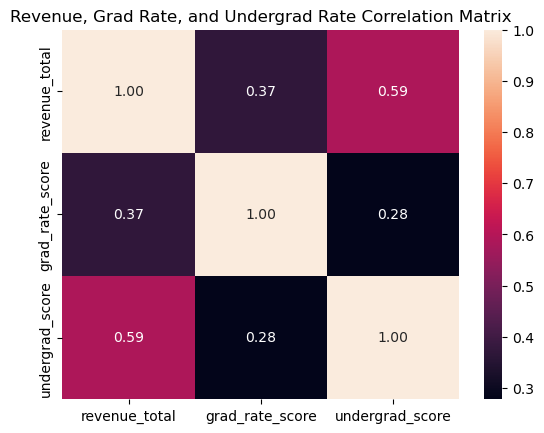

In [98]:
# Correlation heatmap between revenue, grad_rate_score, undergrad_score
features = ['revenue_total', 'grad_rate_score', 'undergrad_score']
correlation_matrix = revenue_and_elements[features].corr()
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f')
plt.title('Revenue, Grad Rate, and Undergrad Rate Correlation Matrix')

In [99]:
# Creating Confusion Matrix

In [122]:
y_pred = cross_val_predict(LogisticRegression(), revenue_and_elements[x_features], 
                           revenue_and_elements['successful'], cv = 5)

In [124]:
cm = confusion_matrix(revenue_and_elements['successful'], y_pred)

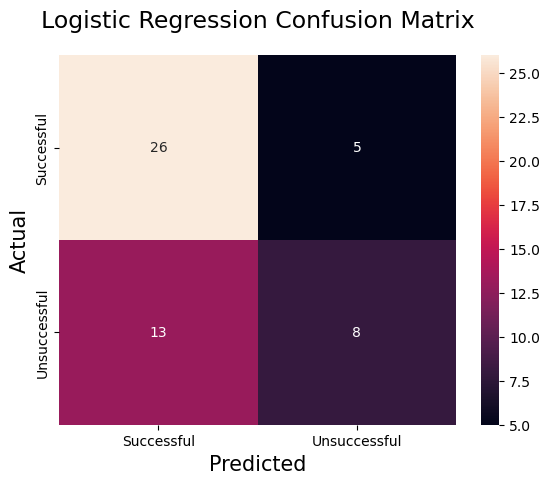

In [125]:
sns.heatmap(cm, annot=True, fmt='g', 
            xticklabels=['Successful', 'Unsuccessful'],
            yticklabels=['Successful', 'Unsuccessful'])
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.title('Logistic Regression Confusion Matrix', fontsize = 17, pad = 20)

plt.show()